In [4]:
import os
import sys
import seaborn as sns
# from statsforecast import StatsForecast
# from statsforecast.models import Holt, ARIMA # Possible source of errors
# from hierarchicalforecast.utils import aggregate
# from hierarchicalforecast.methods import BottomUp, MinTrace
# from hierarchicalforecast.core import HierarchicalReconciliation
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from statsmodels.tsa.arima_model import ARIMA # Possible source of errors

import datetime as dt

import pycountry
import country_converter as coco

rn_con_col_names = ['Country','Code','Year','Other','Solar','Wind','Hydro']
rn_cap_col_names = ['Country','Code','Year','Wind','Hydro','Solar','Other']

rn_con = pd.read_csv('data/modern-renewable-energy-consumption.csv',
                     header=0,
                     names=rn_con_col_names)
rn_cap = pd.read_csv('data/modern-renewable-prod.csv',
                     header=0,
                     names=rn_cap_col_names)

rn_con = rn_con[rn_cap_col_names]
rn_cap = rn_cap[rn_cap_col_names]

rn_con['Continents'] = np.nan
rn_cap['Continents'] = np.nan

# rn_con.drop(columns='Code',inplace=True)
# rn_cap.drop(columns='Code',inplace=True)

rn_con.info()
rn_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     5695 non-null   object 
 1   Code        4361 non-null   object 
 2   Year        5695 non-null   int64  
 3   Wind        4744 non-null   float64
 4   Hydro       5479 non-null   float64
 5   Solar       4683 non-null   float64
 6   Other       4978 non-null   float64
 7   Continents  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 356.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8957 entries, 0 to 8956
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     8957 non-null   object 
 1   Code        7349 non-null   object 
 2   Year        8957 non-null   int64  
 3   Wind        7996 non-null   float64
 4   Hydro       8884 non-null   float64
 5   Solar       7956 non-n

In [2]:
rn_con.head()

,Country,Year,Wind,Hydro,Solar,Other
0,Africa,1971,0.0,26.013390,0.0,0.164
1,Africa,1972,0.0,29.633196,0.0,0.165
2,Africa,1973,0.0,31.345707,0.0,0.170
3,Africa,1974,0.0,35.667076,0.0,0.175
4,Africa,1975,0.0,37.717968,0.0,0.172


In [3]:
rn_cap.head()

,Country,Year,Wind,Hydro,Solar,Other
0,ASEAN (Ember),2000,0.0,50.37,0.0,22.53
1,ASEAN (Ember),2001,0.0,54.26,0.0,22.42
2,ASEAN (Ember),2002,0.0,53.32,0.0,22.67
3,ASEAN (Ember),2003,0.0,53.28,0.0,22.43
4,ASEAN (Ember),2004,0.0,52.88,0.0,24.14


Get a [list of South American Countries](https://en.wikipedia.org/wiki/List_of_South_American_countries_by_population) from Wikipedia

In South America there are 14 Countries.


In [5]:
# List of South American Countries from Wikipedia
Countries_SA = ['Brazil','Colombia','Argentina','Peru','Venezuela','Chile',
                'Ecuador','Bolivia','Paraguay','Uruguay','Guyana','Suriname',
                'French Guiana','Falkland Islands']
Continent    = 'South America'

print(f"In South America there are {len(Countries_SA)} Countries.")

sa_rn_con    = rn_con[rn_con['Country'].isin(Countries_SA)]
sa_rn_cap    = rn_cap[rn_cap['Country'].isin(Countries_SA)]

SA_rn_con    = rn_con[rn_con['Country']==Continent]
SA_rn_cap    = rn_cap[rn_cap['Country']==Continent]

sa_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
sa_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
SA_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
SA_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)

sa_rn_con.info()
sa_rn_cap.info()
SA_rn_con.info()
SA_rn_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 174 to 231
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  406 non-null    object 
 1   Year     406 non-null    int64  
 2   Wind     274 non-null    float64
 3   Hydro    406 non-null    float64
 4   Solar    252 non-null    float64
 5   Other    349 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 22.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 1143 to 8576
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  552 non-null    object 
 1   Year     552 non-null    int64  
 2   Wind     420 non-null    float64
 3   Hydro    552 non-null    float64
 4   Solar    410 non-null    float64
 5   Other    495 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 30.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/4264350918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/4264350918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/4264350918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/777235716.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in sa_rn_con.groupby(['Country']):
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/777235716.py:25: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in sa_rn_cap.groupby(['Country']):
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/777235716.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To contro

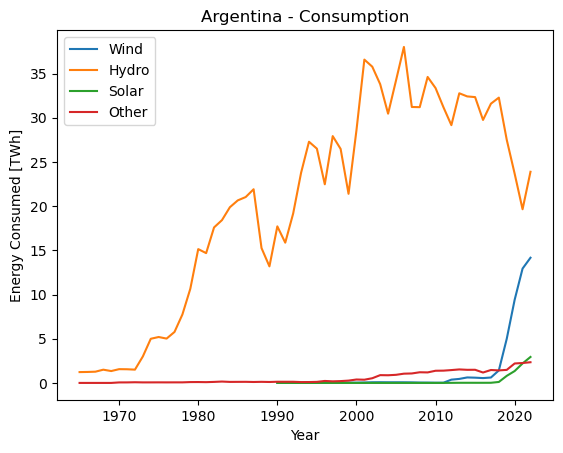

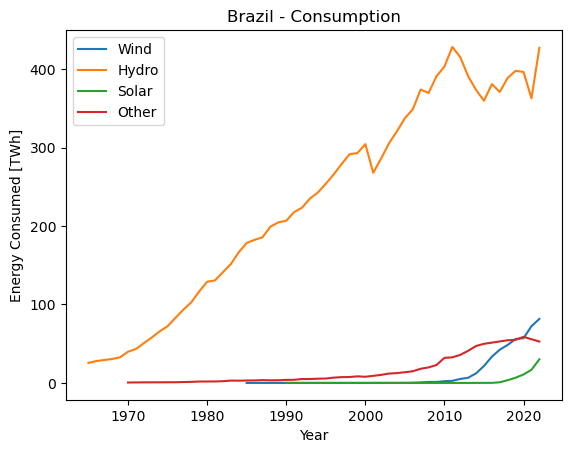

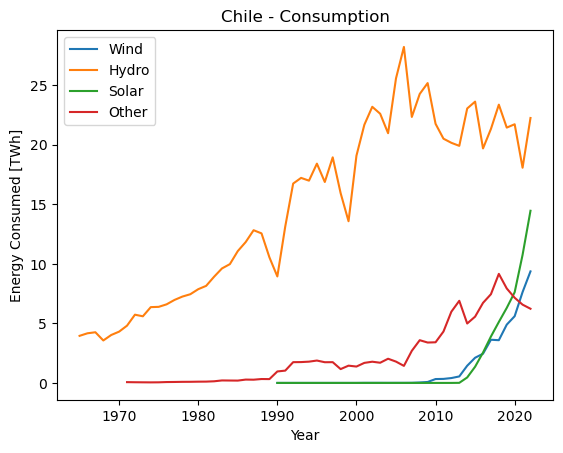

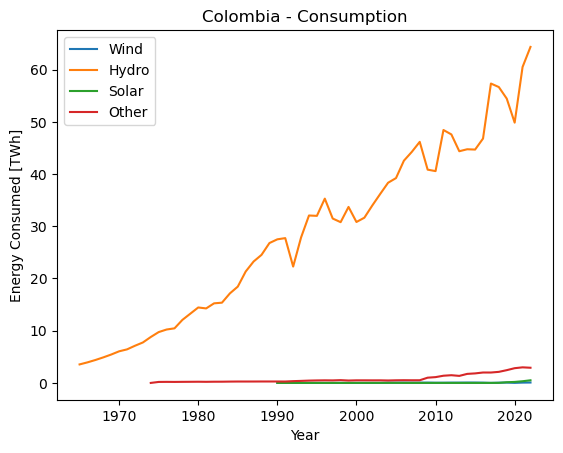

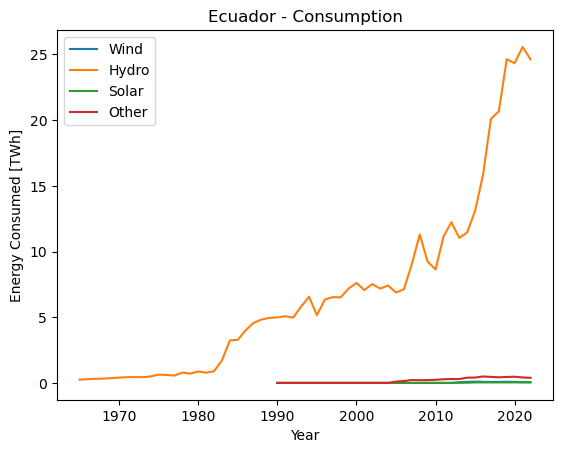

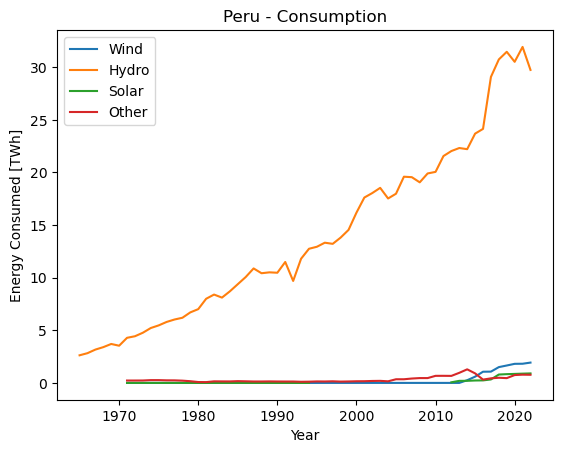

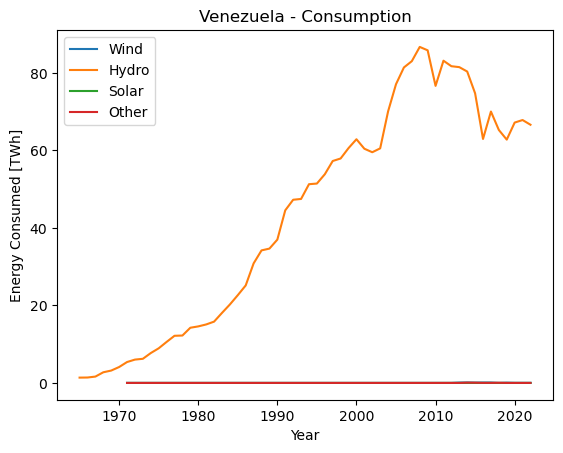

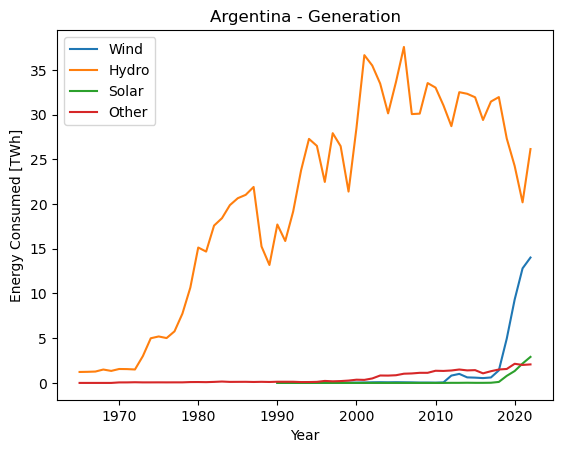

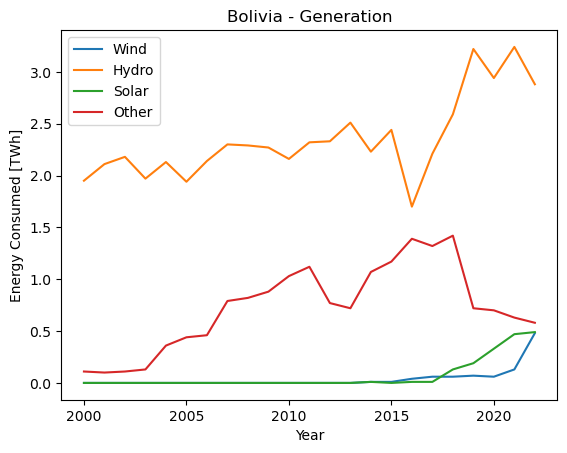

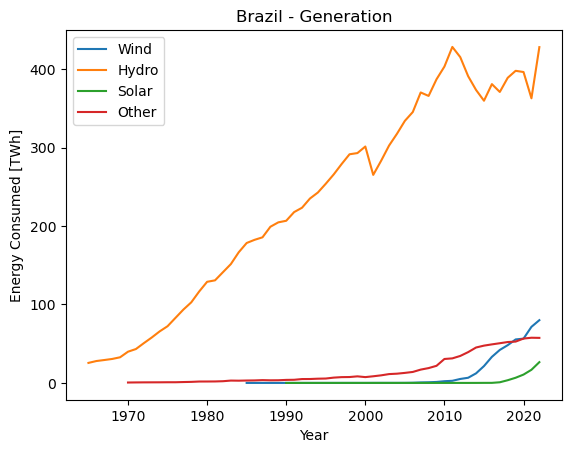

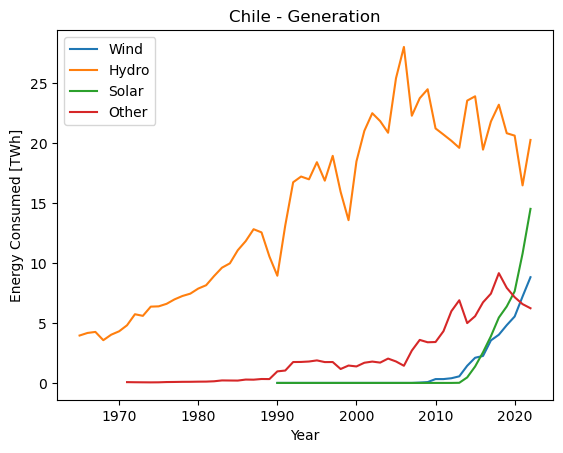

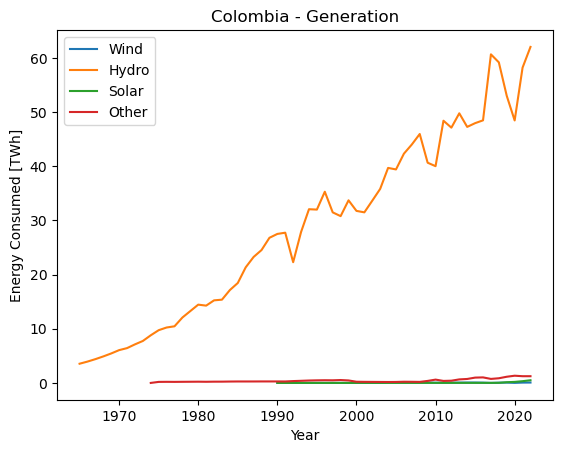

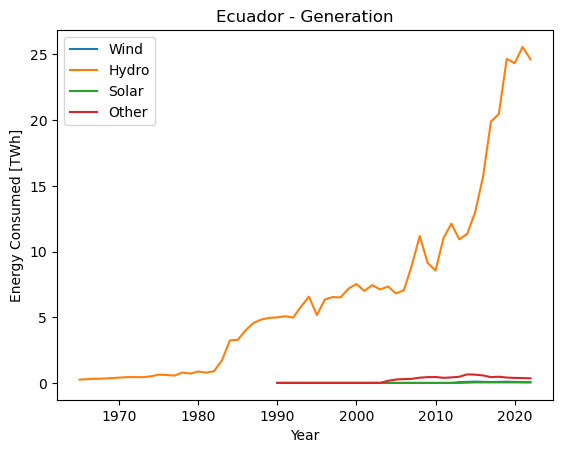

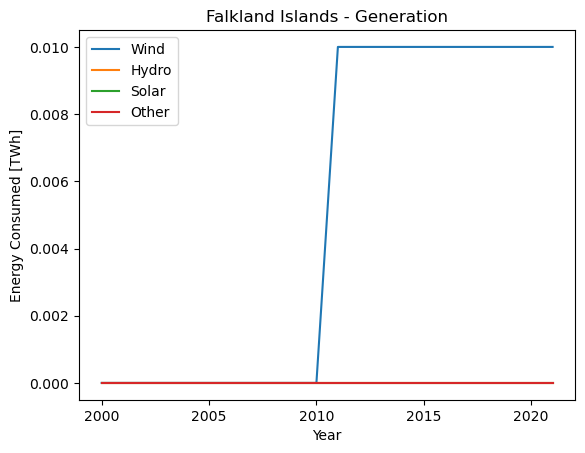

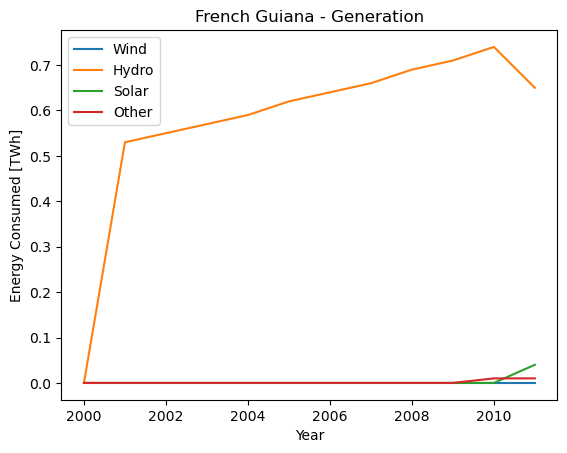

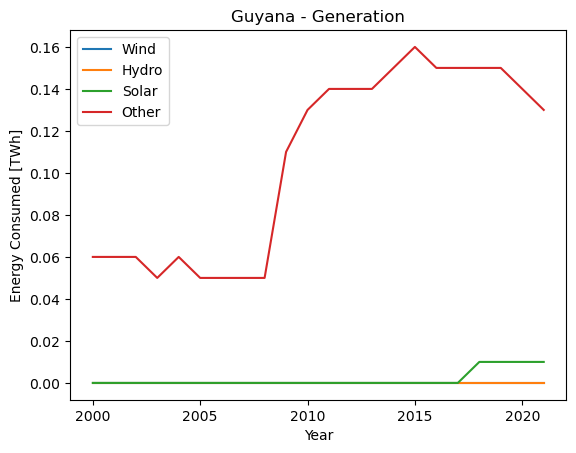

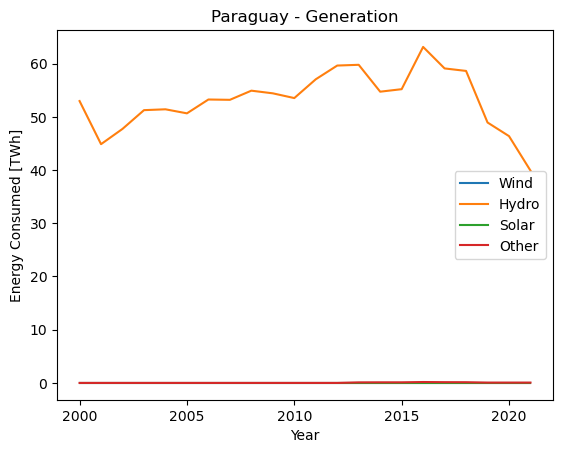

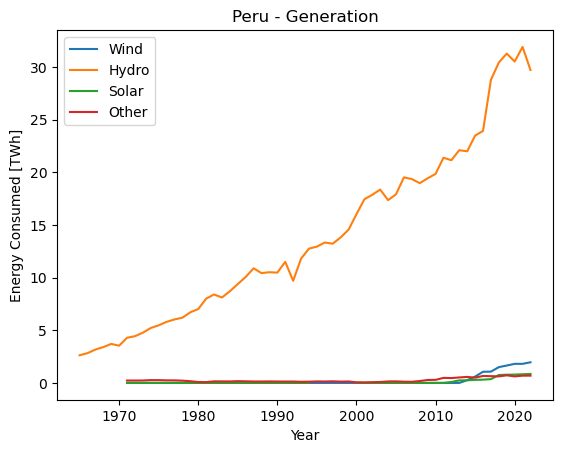

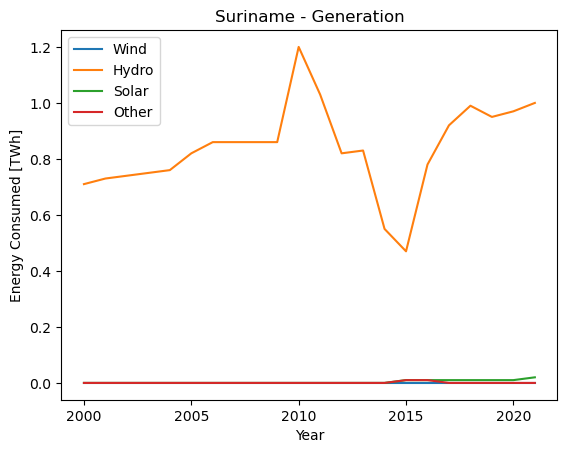

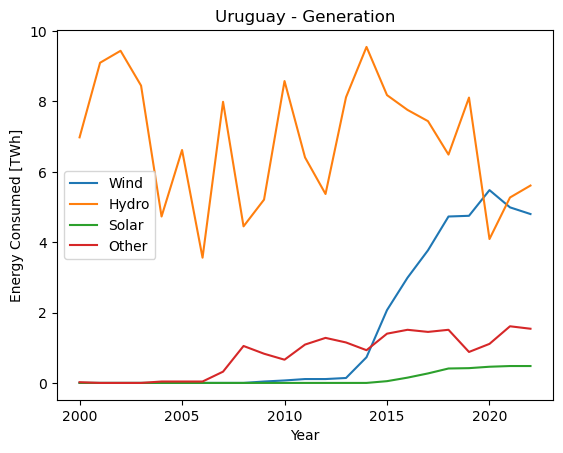

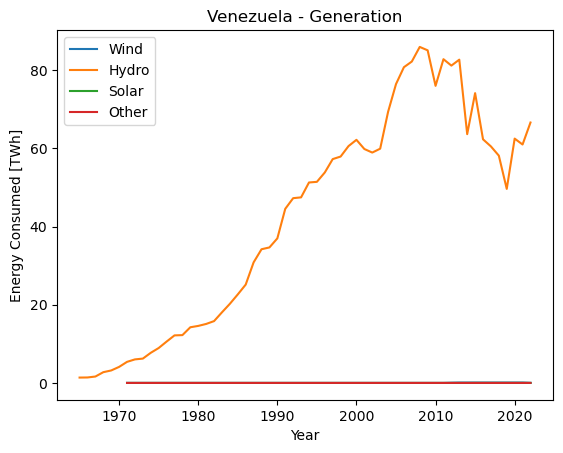

In [6]:
fig_array = []
fig_title = 'South American Energy Consumption by Country'

for title, group in sa_rn_con.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Consumption", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)

with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'South American Energy Consumption by Country'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()

    
fig_array = []
fig_title = 'South American Energy Generation by Country'

for title, group in sa_rn_cap.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Generation", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)
    
with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'South American Energy Generation by Country'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/2529663189.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in SA_rn_con.groupby(['Country']):
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_18959/2529663189.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in SA_rn_cap.groupby(['Country']):


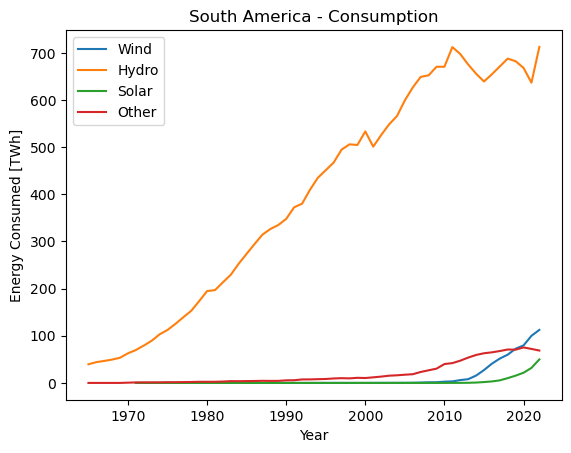

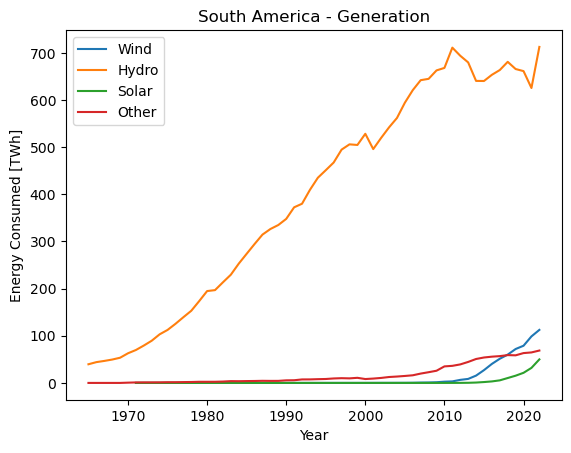

In [7]:
fig_array = []
fig_title = 'South American Energy Generation & Consumption'

for title, group in SA_rn_con.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Consumption", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)

for title, group in SA_rn_cap.groupby(['Country']):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    group.plot(kind='line',x='Year', title=f"{title} - Generation", ax=ax)
    ax.set_ylabel('Energy Consumed [TWh]')
    ax.set_xlabel('Year')
    fig_array.append(fig)
    
with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'South American Energy Generation & Consumption'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()


In [ ]:
# cap_country_code = pd.DataFrame(coco.convert(names=rn_cap['Country'], to='continent'))
# cap_country_code[country_code=='America'].head(20)
# rn_cap[(cap_country_code=='America')[0]]

In [ ]:
# con_country_code = pd.DataFrame(coco.convert(names=rn_con['Country'].unique(), to='continent'))
# con_country_code[country_code=='America'].head(20)

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_53533/304141636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cont_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_53533/304141636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cont_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)


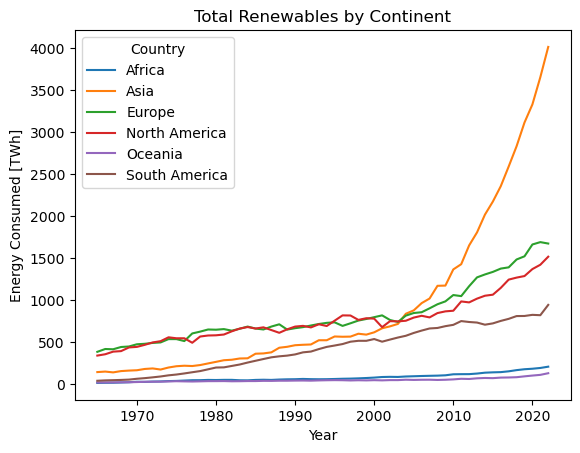

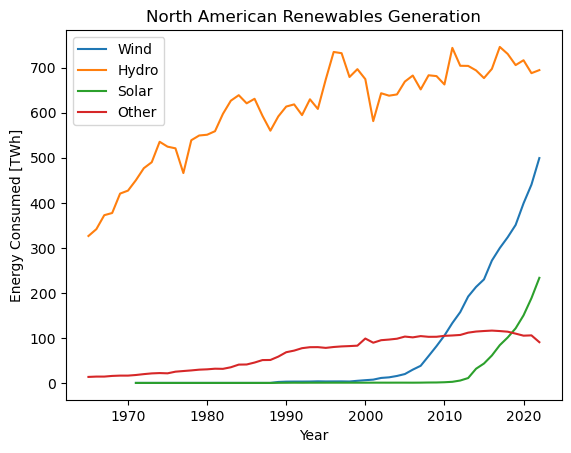

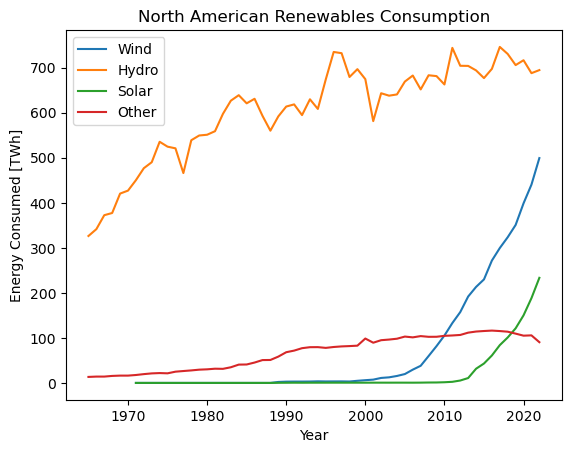

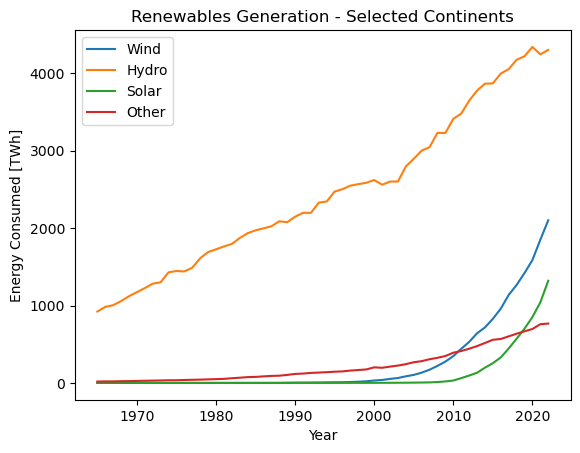

In [94]:
fig_array = []
fig_title = 'Energy Generation & Consumption by Continent'

Continent_list = ['South America','North America','Europe','Asia','Africa','Oceania']

Cont_rn_con    = rn_con[rn_con['Country'].isin(Continent_list)]
Cont_rn_cap    = rn_cap[rn_cap['Country'].isin(Continent_list)]

Cont_rn_con.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)
Cont_rn_cap.sort_values(by=['Year'], axis=0, ascending=True, inplace=True)


Cont_rn_con_sum = Cont_rn_con.groupby(['Country','Year']).sum(numeric_only=True)
Cont_rn_con_sum = Cont_rn_con_sum.sum(axis=1)
Cont_rn_con_sum = Cont_rn_con_sum.unstack(level=0)
Cont_rn_cap_sum = Cont_rn_cap.groupby(['Country','Year']).sum(numeric_only=True)
Cont_rn_cap_sum = Cont_rn_cap_sum.sum(axis=1)
Cont_rn_cap_sum = Cont_rn_cap_sum.unstack(level=0)

Global_rn_cap_sum = Cont_rn_cap[['Year','Wind','Hydro','Solar','Other']].groupby(['Year'])
Global_rn_cap_sum = Global_rn_cap_sum.sum()

NA_rn_con = Cont_rn_con[Cont_rn_con['Country']=='North America']
NA_rn_con = NA_rn_con[['Year','Wind','Hydro','Solar','Other']]
NA_rn_cap = Cont_rn_cap[Cont_rn_cap['Country']=='North America']
NA_rn_con = NA_rn_cap[['Year','Wind','Hydro','Solar','Other']]

# Total Energy by Continent
title   = 'Total Renewables by Continent'
fig, ax = plt.subplots(nrows=1, ncols=1)
Cont_rn_cap_sum.plot(kind='line', title=title,ax=ax)
ax.set_ylabel('Energy Consumed [TWh]')
ax.set_xlabel('Year')
fig_array.append(fig)

# Renewables for North America
fig, ax   = plt.subplots(nrows=1, ncols=1)
title     = 'North American Renewables Generation'
NA_rn_con.plot(kind='line', x='Year', title=title,ax=ax)
ax.set_ylabel('Energy Consumed [TWh]')
ax.set_xlabel('Year')
fig_array.append(fig)
fig, ax   = plt.subplots(nrows=1, ncols=1)
title     = 'North American Renewables Consumption'
NA_rn_con.plot(kind='line', x='Year', title=title,ax=ax)
ax.set_ylabel('Energy Consumed [TWh]')
ax.set_xlabel('Year')
fig_array.append(fig)

# Renewables in Asia, Europe, North America and South America
fig, ax   = plt.subplots(nrows=1, ncols=1)
title     = 'Renewables Generation - Selected Continents'
Global_rn_cap_sum.plot(kind='line', title=title,ax=ax)
ax.set_ylabel('Energy Consumed [TWh]')
ax.set_xlabel('Year')
fig_array.append(fig)

with PdfPages(f'Output/{fig_title}.pdf') as pdf:
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'Energy Generation & Consumption Macro Data'
    d['Author'] = 'Connor Blandford'
    d['CreationDate'] = dt.datetime.today()